# Predicting crime rates USA

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)

In [6]:
missing_values_string = ['', ' ', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND',
                         '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null', '?']
data = pd.DataFrame(pd.read_csv("communities.csv", na_values=missing_values_string))

In [7]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [8]:
data.describe()

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,820.000000,817.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,319.000000,319.000000,319.000000,319.000000,1994.000000,319.000000,1994.000000
mean,28.683551,58.826829,46188.336597,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,...,0.065231,0.232854,0.161685,0.163103,0.076708,0.698589,0.440439,0.094052,0.195078,0.237979
std,16.397553,126.420560,25299.726569,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,...,0.109459,0.203092,0.229055,0.214778,0.140207,0.213944,0.405808,0.240328,0.164718,0.232985
min,1.000000,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,9.000000,25065.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,...,0.020000,0.100000,0.020000,0.040000,0.020000,0.620000,0.000000,0.000000,0.110000,0.070000
50%,34.000000,23.000000,48090.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,...,0.040000,0.170000,0.070000,0.080000,0.030000,0.750000,0.500000,0.000000,0.150000,0.150000
75%,42.000000,59.500000,66660.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,...,0.070000,0.280000,0.190000,0.195000,0.060000,0.840000,1.000000,0.000000,0.220000,0.330000
max,56.000000,840.000000,94597.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Are the food titles unique ? 
len(data['title'].unique())

17736

In [6]:
#Are the same foods duplicate or do they have different features ? 
data.duplicated().value_counts()

False    18251
True      1801
dtype: int64

In [7]:
#Let's remove the duplicates
data = data.drop_duplicates()
print("Number of title duplicates: " + str(len(data)-len(data.title.value_counts())))
print("Corresponds to: " + str(100*(len(data)-len(data.title.value_counts()))/len(data)) + "percent of our original dataset.")

Number of title duplicates: 515
Corresponds to: 2.8217631910580243percent of our original dataset.


We dropped the duplicates, there are still 515 foods that are not unique but that are not duplicates. Let's look at some of those.  

In [8]:
title_dup = pd.DataFrame(data=pd.concat(g for _, g in data.groupby("title") if len(g) > 1))
title_dup

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
2212,All-Butter Pastry Dough,4.375,1378.0,17.0,93.0,599.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14622,All-Butter Pastry Dough,5.000,2790.0,34.0,186.0,1780.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3145,Anchovy Mayonnaise,3.125,471.0,10.0,44.0,1000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10907,Anchovy Mayonnaise,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14106,Angel Punch,4.375,50.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15860,Yogurt and Lemon Dressing,0.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2870,Yorkshire Puddings,4.375,189.0,8.0,5.0,679.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3391,Yorkshire Puddings,3.750,195.0,10.0,6.0,103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
615,Za'atar,5.000,4.0,0.0,0.0,210.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Considering that these foods correspond to only 2.8 percent of our dataset it doesn't make sense to spend to much time retrieving all of them. We can see that some of the title duplicates have NaN values, we can remove those and keep the food for which we have information. This way we can retrieve some of the foods and then discard the remaining.   

In [9]:
rm_index_list = title_dup[np.isnan(title_dup['calories'])]
rm_index_list = sorted(rm_index_list.index)

In [10]:
data = data.drop(rm_index_list)
data = data.drop_duplicates(subset='title',keep = False)
len(data)

17451

We now have roughly 96% of our initial data. Let's see if we can remove some of the columns. 

In [11]:
data.dtypes

title          object
rating        float64
calories      float64
protein       float64
fat           float64
               ...   
cookbooks     float64
leftovers     float64
snack         float64
snack week    float64
turkey        float64
Length: 680, dtype: object

In [12]:
data.dtypes.value_counts()

float64    679
object       1
dtype: int64

We see that the features are all floats, the only non numerical value is the title of the food. 
Let's reduce the number of columns in the dataset, most of the columns have mostly empty values as we can see from the 75 percentile in data.describe. Let's remove all the columns that have a 75 percentile of 0.

In [13]:
data.quantile(.75).value_counts()

0.000      665
1.000        9
745.000      1
35.000       1
29.000       1
608.000      1
4.375        1
Name: 0.75, dtype: int64

The dataset has 680 columns, we see that 665 columns have a quantile of 0, 9 columns have a quantile of 1.0 and the remaining values of quantile correspond to the first 5 columns (calories, sodium, fat, protein, rating). Let's explore the 9 columns that have a 75 percentile of 1 and see what they look like. 

In [14]:
col_list = []
col_list_labels = []
for column in data.columns:
    if data[column].dtype == np.float64:
        if data[column].quantile(.75)>0:
            col_list.append(column)
        if data[column].quantile(.75)==1:
            col_list_labels.append(column)
    else:
        col_list.append(column)
data = data[col_list]

In [15]:
data

,title,rating,calories,protein,fat,sodium,bon appétit,gourmet,kosher,peanut free,pescatarian,quick & easy,soy free,tree nut free,vegetarian
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20046,Chinese Barbecued Spareribs,3.750,998.0,55.0,80.0,2027.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


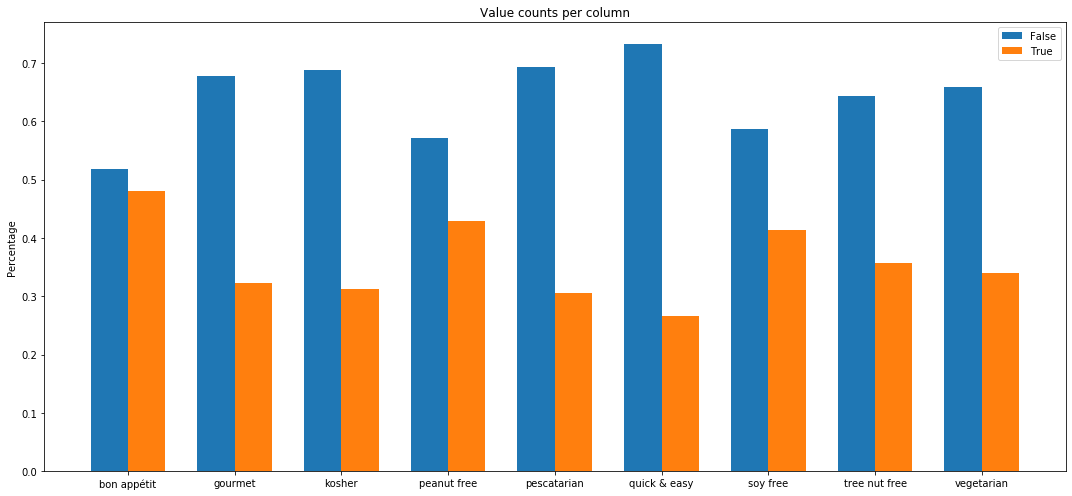

In [16]:
zeros = []
ones = []
for column in col_list_labels: 
    counts = data[column].value_counts(normalize = True)
    zeros.append(counts[0])
    ones.append(counts[1])

x = np.arange(len(col_list_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15,7))
rects1 = ax.bar(x - width/2, zeros, width, label='False')
rects2 = ax.bar(x + width/2, ones, width, label='True')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Value counts per column')
ax.set_xticks(x)
ax.set_xticklabels(col_list_labels)
ax.legend()

fig.tight_layout()

plt.show()

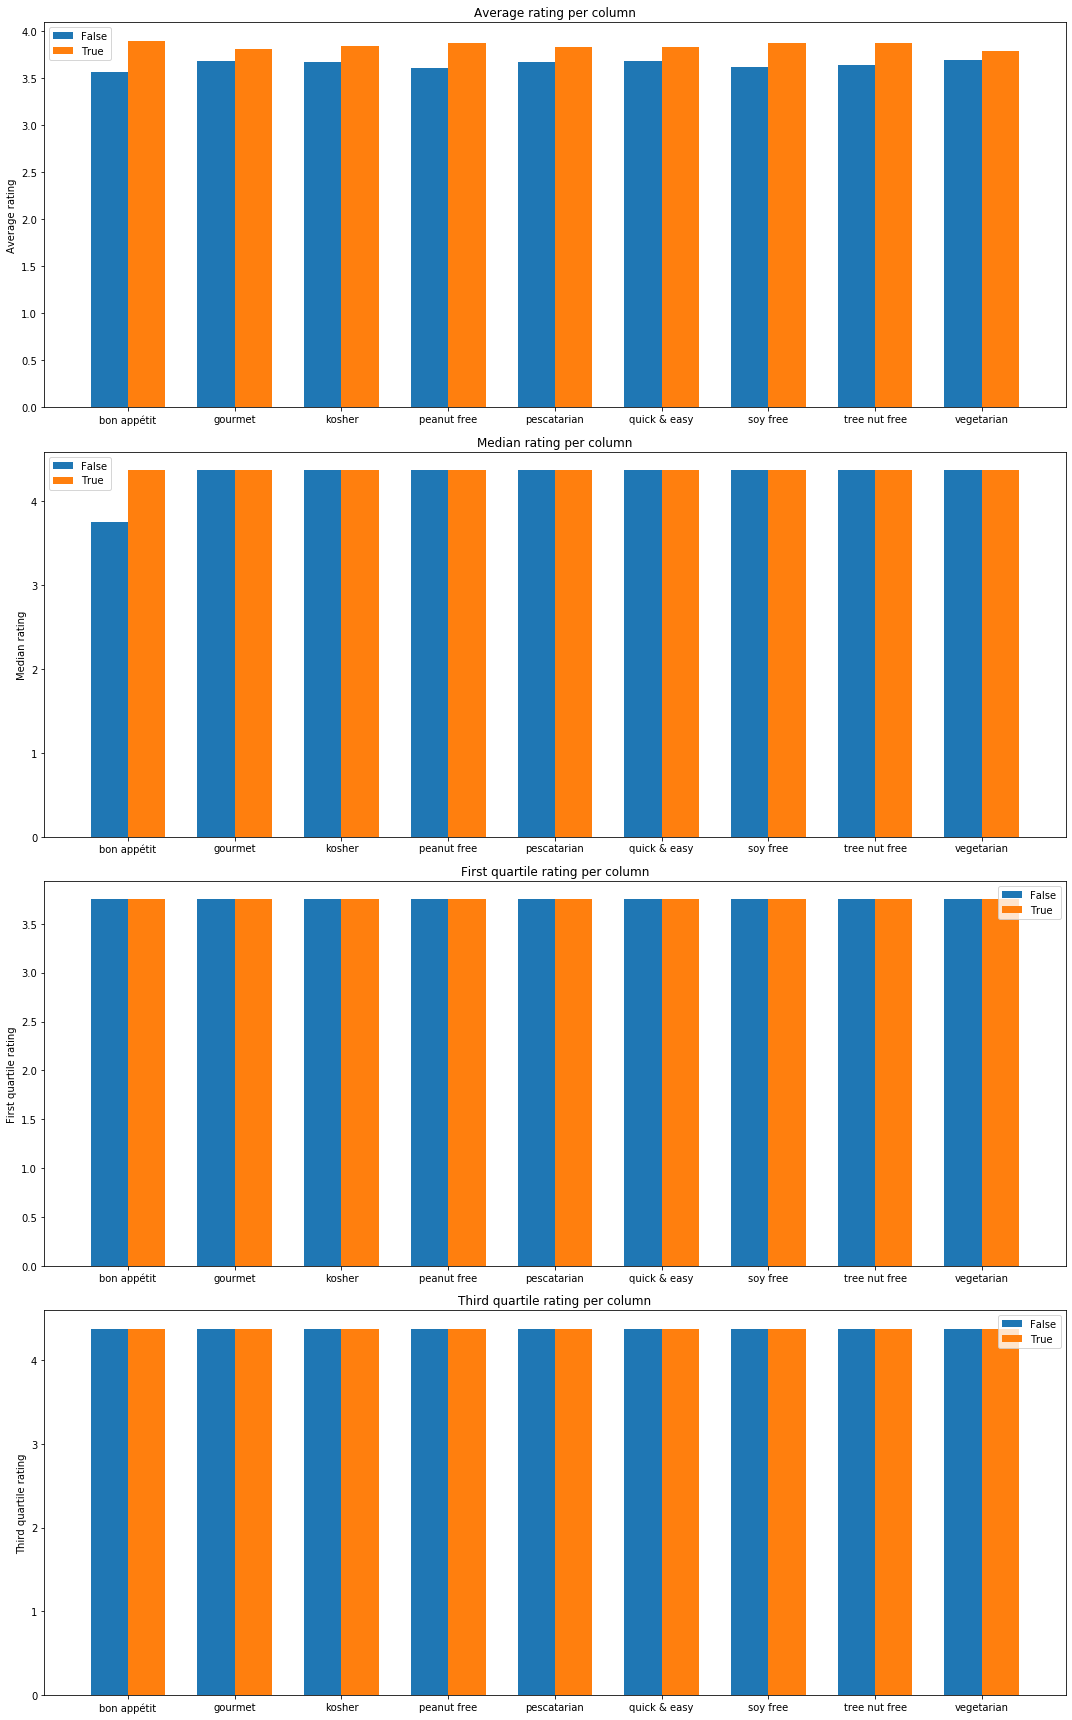

In [17]:
#Let's see if the fact that a food belongs to a label influences the rating
mean_zeros = []
mean_ones = []
quantile5_zeros = []
quantile5_ones = []
quantile25_zeros = []
quantile25_ones = []
quantile75_zeros = []
quantile75_ones = []

for column in col_list_labels: 
    mean_zeros.append(data[data[column] == 0].rating.mean())
    mean_ones.append(data[data[column] == 1].rating.mean())
    quantile5_zeros.append(data[data[column] == 0].rating.quantile(.5))
    quantile5_ones.append(data[data[column] == 1].rating.quantile(.5))
    quantile25_zeros.append(data[data[column] == 0].rating.quantile(.25))
    quantile25_ones.append(data[data[column] == 1].rating.quantile(.25))
    quantile75_zeros.append(data[data[column] == 0].rating.quantile(.75))
    quantile75_ones.append(data[data[column] == 1].rating.quantile(.75))

x = np.arange(len(col_list_labels))  # the label locations
width = 0.35  # the width of the bars

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (15,24))
rects1 = ax1.bar(x - width/2, mean_zeros, width, label='False')
rects2 = ax1.bar(x + width/2, mean_ones, width, label='True')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Average rating')
ax1.set_title('Average rating per column')
ax1.set_xticks(x)
ax1.set_xticklabels(col_list_labels)
ax1.legend()

rects1 = ax2.bar(x - width/2, quantile5_zeros, width, label='False')
rects2 = ax2.bar(x + width/2, quantile5_ones, width, label='True')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Median rating')
ax2.set_title('Median rating per column')
ax2.set_xticks(x)
ax2.set_xticklabels(col_list_labels)
ax2.legend()

rects1 = ax3.bar(x - width/2, quantile25_zeros, width, label='False')
rects2 = ax3.bar(x + width/2, quantile25_ones, width, label='True')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax3.set_ylabel('First quartile rating')
ax3.set_title('First quartile rating per column')
ax3.set_xticks(x)
ax3.set_xticklabels(col_list_labels)
ax3.legend()

rects1 = ax4.bar(x - width/2, quantile75_zeros, width, label='False')
rects2 = ax4.bar(x + width/2, quantile75_ones, width, label='True')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax4.set_ylabel('Third quartile rating')
ax4.set_title('Third quartile rating per column')
ax4.set_xticks(x)
ax4.set_xticklabels(col_list_labels)
ax4.legend()

fig.tight_layout()

plt.show()

The labels do not influence the rating, we can therefore drop these columns and only focus on the nutritional content. 

In [18]:
col_list = ["title","rating","calories","protein","fat", "sodium"]
data = data[col_list]

In [19]:
data.describe()

,rating,calories,protein,fat,sodium
count,17451.000000,1.383400e+04,13811.000000,1.379300e+04,1.383300e+04
mean,3.724679,6.924901e+03,96.134313,3.798166e+02,6.873686e+03
std,1.316722,3.837218e+05,3594.519557,2.186035e+04,3.567285e+05
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,3.750000,2.090000e+02,3.000000,9.000000e+00,9.400000e+01
50%,4.375000,3.540000e+02,9.000000,1.800000e+01,3.130000e+02
75%,4.375000,6.080000e+02,29.000000,3.500000e+01,7.450000e+02
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07


In [20]:
data.isna().sum()

title          0
rating         0
calories    3617
protein     3640
fat         3658
sodium      3618
dtype: int64

In [21]:
NaNs = data.isnull().sum(axis=1)
NaNs.value_counts()

0    13789
4     3617
1       25
2       20
dtype: int64

We can see a few things from these tables, first we see that generally if there is a missing value all nutritional information is missing. The number of missing values is roughly 20%, which means we cannot simply discard them. We also notice that for some columns there are outliers, for instance for the protein content, the median value is 9 but the max value is 236489 which seems wrong. 

Since we are working with numerical data, it would be nice to substitute the missing data with the average value for the column. However, if all nutritional information is missing it means that we will have a lot of duplicates over different rating values and this will bring no extra information for our model. At the same time if we substitute the values with averages per rating bin we are biasing our model.  

Also if there are large outliers the average value will also be off. Let's visualize the outliers.

## Outliers

Text(0.5, 1.0, 'sodium')

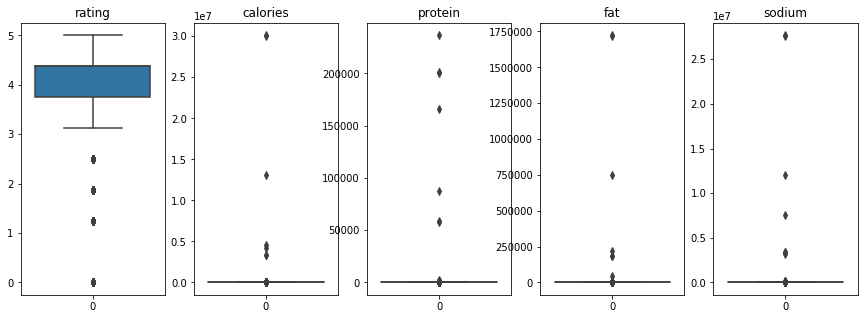

In [22]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize = (15,5))
sns.boxplot(data=data.rating, ax=ax1)
ax1.set_title("rating")
sns.boxplot(data=data.calories, ax=ax2)
ax2.set_title("calories")
sns.boxplot(data=data.protein, ax=ax3)
ax3.set_title("protein")
sns.boxplot(data=data.fat, ax=ax4)
ax4.set_title("fat")
sns.boxplot(data=data.sodium, ax=ax5)
ax5.set_title("sodium")

We can see that for the nutritional values there are outliers that are so far out the norm, that we cannot even see the boxplot.

In [23]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [24]:
#Let's remove far outliers (3xIQR)
data_out = data[~((data < (Q1 - 3 * IQR)) |(data > (Q3 + 3 * IQR))).any(axis=1)]
len(data_out)

14962

Text(0.5, 1.0, 'sodium')

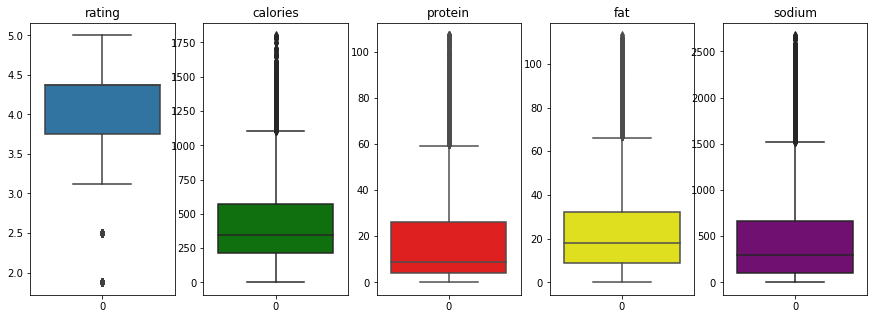

In [25]:
#Let's see how the boxplot look right now
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize = (15,5))
sns.boxplot(data=data_out.rating, ax=ax1)
ax1.set_title("rating")
sns.boxplot(data=data_out.calories, ax=ax2, color="Green")
ax2.set_title("calories")
sns.boxplot(data=data_out.protein, ax=ax3, color = "Red")
ax3.set_title("protein")
sns.boxplot(data=data_out.fat, ax=ax4, color="Yellow")
ax4.set_title("fat")
sns.boxplot(data=data_out.sodium, ax=ax5, color = "Purple")
ax5.set_title("sodium")

We have removed a significant amount of data, with more knowledge about the dataset it would have probably been possible to save a bit more data. For instance, maybe the outliers are due to different units of measurement. However with the information available we could only remove them or replace them with some other value. Let's try this second option too: in this case since we are keeping the outliers but replacing them we cannot use the average which is very sensitive, it is best to use the median.

In [26]:
median = data.median()
outliers = ((data < (Q1 - 3 * IQR)) |(data > (Q3 + 3 * IQR)))
data_out2 = data[col_list]
data_out2.fillna(-1, inplace=True)
data_out2[outliers] = np.nan
data_out2.fillna(median, inplace=True)
data_out2[data_out2 == -1] = np.nan
len(data_out2)

17451

Text(0.5, 1.0, 'sodium')

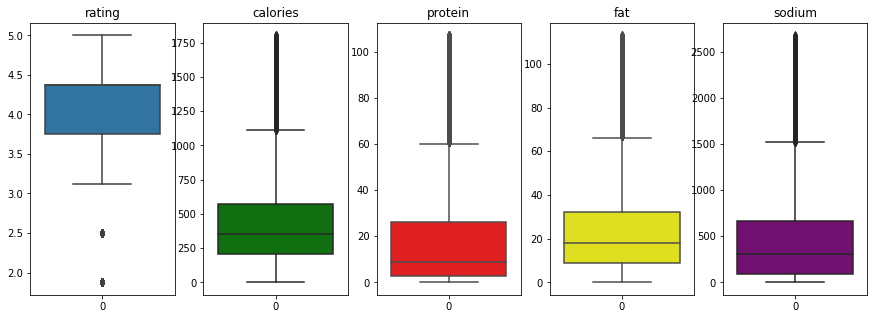

In [27]:
#Let's see how the boxplot look right now
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize = (15,5))
sns.boxplot(data=data_out2.rating, ax=ax1)
ax1.set_title("rating")
sns.boxplot(data=data_out2.calories, ax=ax2, color="Green")
ax2.set_title("calories")
sns.boxplot(data=data_out2.protein, ax=ax3, color = "Red")
ax3.set_title("protein")
sns.boxplot(data=data_out2.fat, ax=ax4, color="Yellow")
ax4.set_title("fat")
sns.boxplot(data=data_out2.sodium, ax=ax5, color = "Purple")
ax5.set_title("sodium")

The two approaches give very similar results, as such let's go for the second as it allows us to keep more data. 

## Missing values

Let's see if there is a correlation between the rating and the missing values. 

In [28]:
data_nan = data[data.isna().any(axis=1)]

Text(0.5, 1.0, 'Rating distribution for whole dataset')

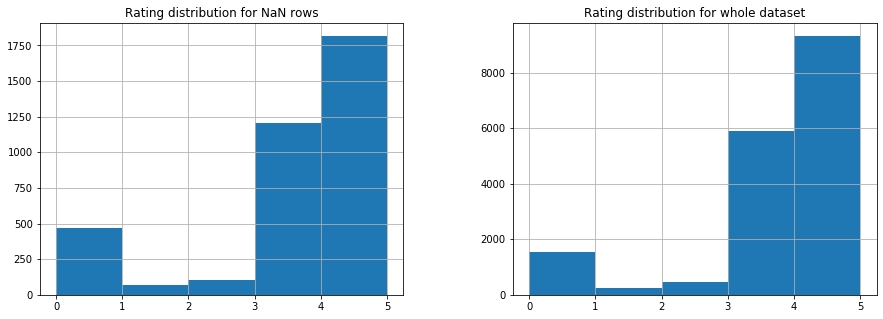

In [29]:
#Let's plot the rating for this subset of data
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5))
hist = data_nan.hist(bins=5, column="rating", ax = ax1)
ax1.set_title("Rating distribution for NaN rows")
hist = data.hist(bins=5, column="rating", ax = ax2)
ax2.set_title("Rating distribution for whole dataset")

Rows with missing values do not seem to correspond to better or worse rating. Considering that we want to apply a linear regression on the dataset and that the size of the dataset is large we can decide to drop the rows that have 4 missing values. For the remaining rows where only one or two values are missing we will substitute them with the average value.

Indeed if we substitute all the rows with 4 missing values in them with the average over the entire dataset we are only introducing replicates which are not useful for the model (they do not carry extra information) and I believe it is safer to drop the rows then to introduce a bias by filling the missing values with the average value per rating bin. 

In [30]:
data_out2 = data_out2[data_out2.isnull().sum(axis=1)<4]
len(data_out2)

13834

In [31]:
#Now let's replace the remaining null value with the average
mean = data.mean()
data_out2.fillna(mean, inplace=True)

## Feature exploration

We now have preprocessed our data, let's visualize the distributions of the features and if they are in anyway correlated with the rating. We want to explore the linear correlations between rating and the remaining features. 

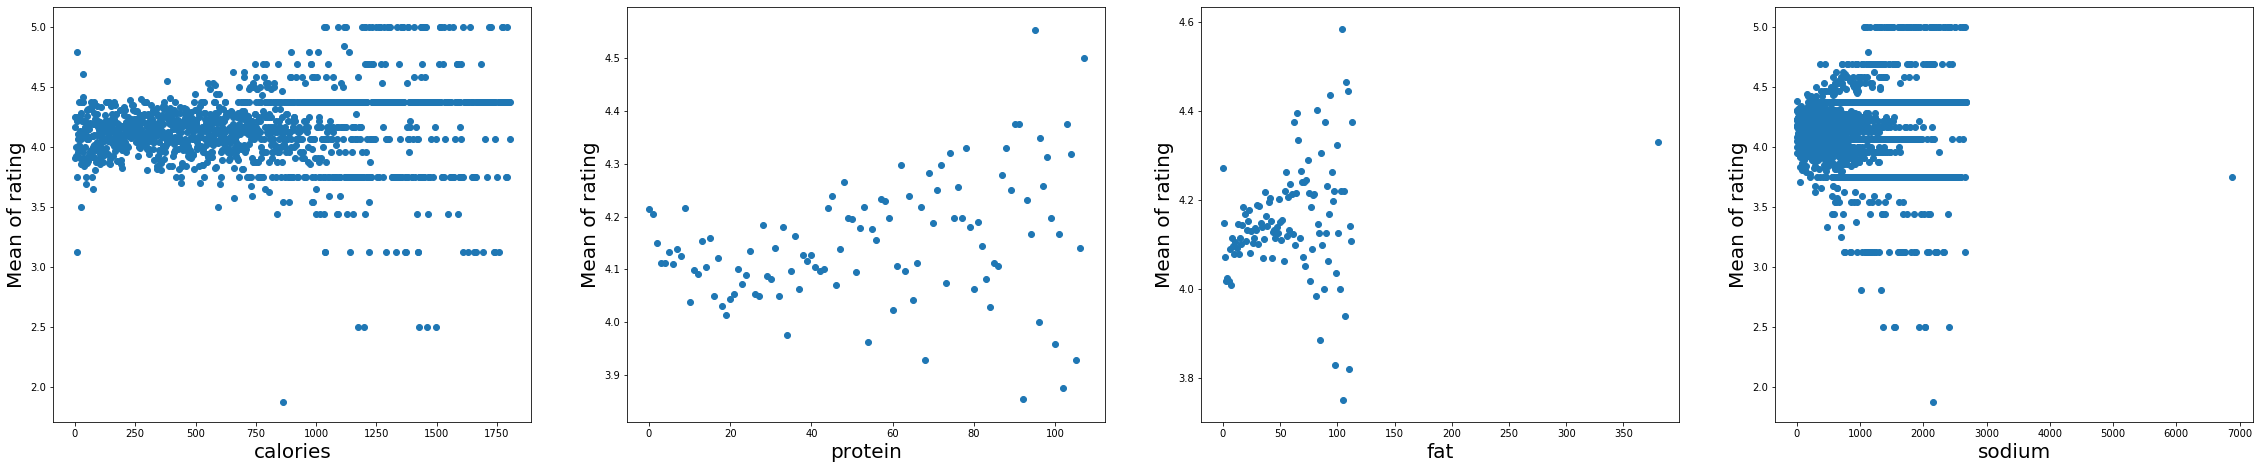

In [32]:
plt.figure(figsize=(60,90))
i =1
col_list = ["calories","protein", "fat", "sodium"]
for col in col_list:
    rating_var = data_out2.groupby(col).rating.mean()
    var = data_out2.groupby(col).size()
    ax = plt.subplot(10,6, i)
    plt.scatter(var.index,rating_var)
    plt.xlabel(col, size=20)
    plt.ylabel('Mean of rating', size=20)
    i = i+1

This doesn't look very promising for our regression task, there isn't a clear trend, of course by showing the mean for every value of "col" we are not grouping the data in most meaningful way. Let's try and apply a principal components analysis and see if we can extract more meaningful variables. 

In [33]:
#find subset of data and normalize it
from sklearn.preprocessing import StandardScaler
X = data_out2[col_list]
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [34]:
#Derive principle components
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(X)

data_PCA = pd.DataFrame(data = principalComponents
             , columns = ['pc1','pc2'])

In [40]:
data_PCA['rating'] = data_out2.rating

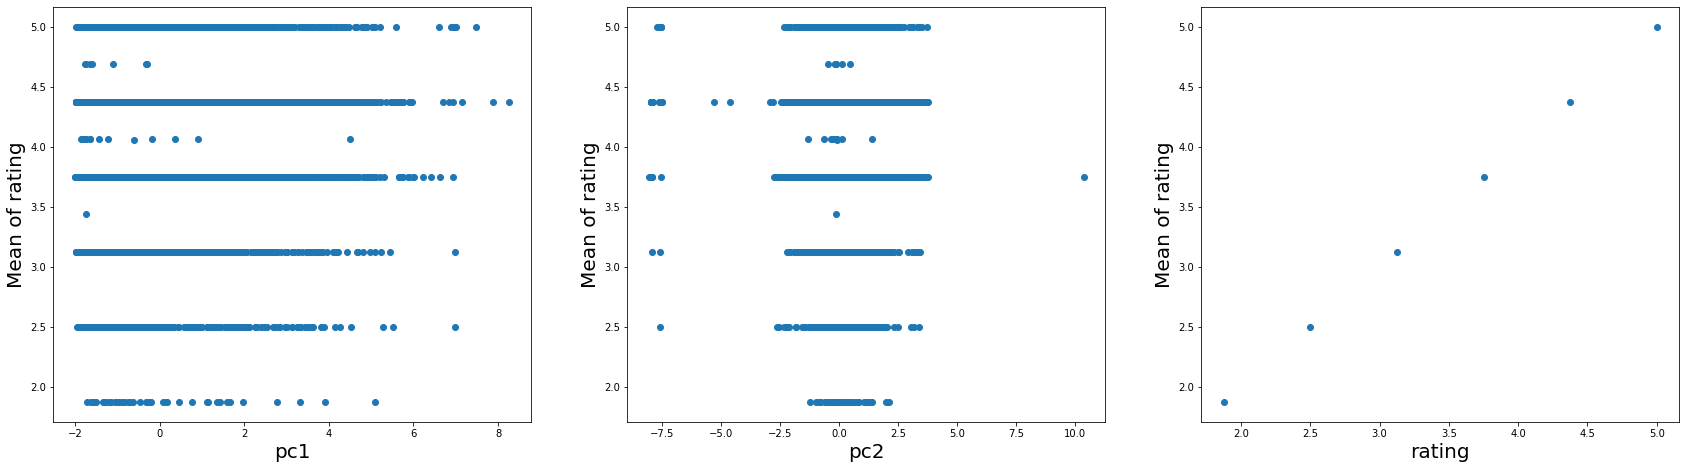

In [41]:
plt.figure(figsize=(60,90))
i =1
for col in data_PCA.columns:
    rating_var = data_PCA.groupby(col).rating.mean()
    var = data_PCA.groupby(col).size()
    ax = plt.subplot(10,6, i)
    plt.scatter(var.index,rating_var)
    plt.xlabel(col, size=20)
    plt.ylabel('Mean of rating', size=20)
    i = i+1

## Linear Regression 

Let's try and apply the linear regression model both on the original, scaled dataset, and on the dataset that we get from the PCA.

First let's split our data in test and train.

In [42]:
X_PCA = data_PCA.loc[:, (data_PCA.columns != 'rating')].values
y = data_out2['rating']

In [43]:
#We divide into a training and test set with 30% dedicated to testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y, test_size=0.3, random_state=0)

In [44]:
#We create the linear model and fit it to our training data
from sklearn.linear_model import LinearRegression
lr_regr = LinearRegression()
lr_regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
lr_regr_PCA = LinearRegression()
lr_regr_PCA.fit(X_PCA_train,y_PCA_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pred = lr_regr.predict(X_test)
y_PCA_pred = lr_regr_PCA.predict(X_PCA_test)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
# The mean squared error
print('Mean squared error after PCA: %.2f'
      % mean_squared_error(y_PCA_test, y_PCA_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination after PCA: %.2f'
      % r2_score(y_PCA_test, y_PCA_pred))

Mean squared error: 0.33
Coefficient of determination: 0.00
Mean squared error after PCA: 0.33
Coefficient of determination after PCA: 0.00


As expected the results of the Linear Regression are not great, we didn't see any linearity in the original values or in the principal components. 

Let's see if a Random Forest Tree gives us better predictions. 

In [58]:
#We create the random forest regression model and fit it to our training data
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(n_estimators=100, max_depth=100,
                                random_state=0)
rf_regr.fit(X_train, y_train)

rf_regr_PCA = RandomForestRegressor(n_estimators=100, max_depth=100,
                                random_state=0)
rf_regr_PCA.fit(X_PCA_train, y_PCA_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [59]:
y_pred = rf_regr.predict(X_test)
y_PCA_pred = rf_regr_PCA.predict(X_PCA_test)

In [62]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
# The mean squared error
print('Mean squared error after PCA: %.2f'
      % mean_squared_error(y_PCA_test, y_PCA_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination after PCA: %.2f'
      % r2_score(y_PCA_test, y_PCA_pred))

Mean squared error: 0.36
Coefficient of determination: -0.10
Mean squared error after PCA: 0.37
Coefficient of determination after PCA: -0.14


To be honest I am not sure why the results are so bad. It might be that this problem cannot be solved as regression. One possibility is to treat it as a classification problem and try to see if it is possible to determine if we can predict if the rating is going to be good or bad. However looking at the distribution of the rating since most of the values are in the 4-5 it isn't trivial to make this a classification problem. 